Support Vectors:
[[3. 3.]
 [8. 7.]]


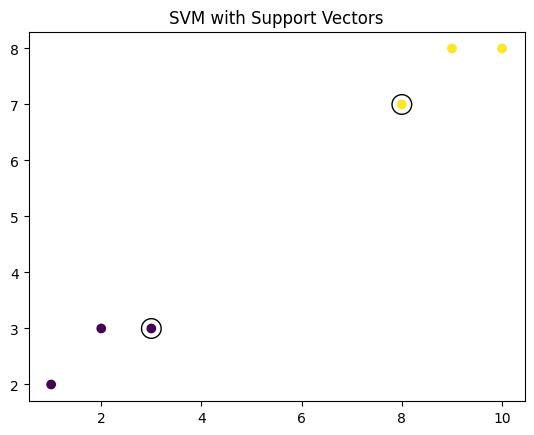

In [1]:
# Step 1: Import libraries
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Step 2: Create simple dataset
X = np.array([
    [1, 2],
    [2, 3],
    [3, 3],
    [8, 7],
    [9, 8],
    [10, 8]
])

y = np.array([0, 0, 0, 1, 1, 1])  # 0 = Class A, 1 = Class B

# Step 3: Train SVM model
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

# Step 4: Print Support Vectors
print("Support Vectors:")
print(model.support_vectors_)

# Step 5: Plot Data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='k')

plt.title("SVM with Support Vectors")
plt.show()

In [2]:
import pandas as pd 


In [3]:
df=pd.read_csv("abalone.csv")
df

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df = pd.get_dummies(df, columns=["Type"], drop_first=True)

In [5]:
X = df.drop("Rings", axis=1)
y = df["Rings"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=100, epsilon=0.2)
model.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.2
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [9]:
y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 4.85048257546767
R2 Score: 0.5519271630707799


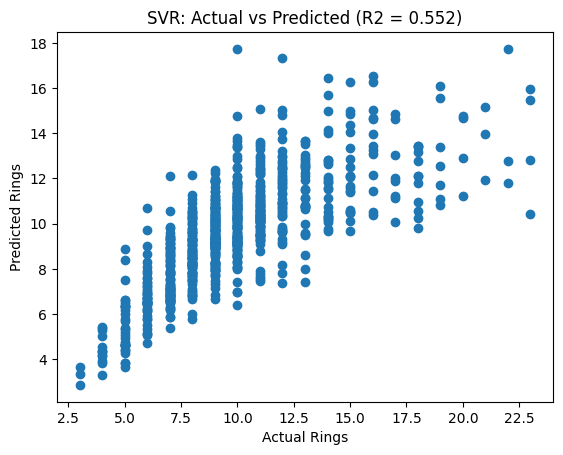

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# R2 Score
r2 = r2_score(y_test, y_pred)

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title(f"SVR: Actual vs Predicted (R2 = {r2:.3f})")
plt.show()

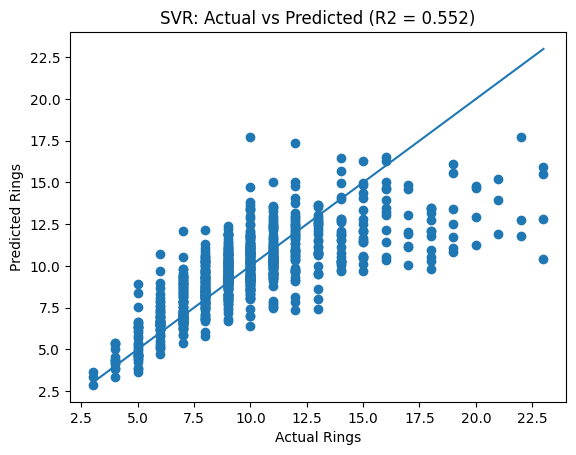

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Predict
y_pred = model.predict(X_test)

# R2 Score
r2 = r2_score(y_test, y_pred)

# Plot
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title(f"SVR: Actual vs Predicted (R2 = {r2:.3f})")

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

plt.show()